In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[:] / n

def get_seq(X,y, n = 10):
    new_y = y[n:]
    new_X = []
    for i in range(len(X) - n):
        new_X.append(np.concatenate((X[i+n], y[i:i+n]), axis = None))
    new_X = np.array(new_X)
    new_y = np.array(new_y)
    return new_X, new_y

In [17]:
data = pd.read_csv('data_for_MIPT.csv')

In [99]:
data.corr()

,sect1_pressure_delta_1,sect1_pressure_delta_2,sect1_pressure_delta_3,sect1_pressure_delta_4,sect1_pressure_delta_5,sect1_pressure_delta_6,sect1_pressure_delta_7,sect1_pressure_delta_8,sect1_pressure_delta_9,sect1_pressure_delta_10,...,sect4_temperature_5,sect4_temperature_6,sect4_temperature_7,sect4_temperature_8,sect4_temperature_9,sect4_temperature_10,outdoor_temperature,cat_lab_analyzer,cat_days,target
sect1_pressure_delta_1,1.000000,0.996483,0.966900,0.629244,0.670429,0.685504,0.607809,0.387191,0.087241,0.970749,...,-0.027308,-0.008828,0.146566,0.149733,0.152775,0.150910,-0.851008,-0.039024,-0.785498,0.719008
sect1_pressure_delta_2,0.996483,1.000000,0.962558,0.601770,0.632109,0.651562,0.571402,0.342795,0.038443,0.970974,...,-0.009353,0.017078,0.187902,0.193058,0.195543,0.194169,-0.855601,-0.022492,-0.815127,0.754069
sect1_pressure_delta_3,0.966900,0.962558,1.000000,0.783127,0.678678,0.587002,0.506456,0.292357,0.282610,0.962174,...,0.064405,0.118093,0.262502,0.271819,0.272640,0.272079,-0.814760,0.022290,-0.648690,0.793787
sect1_pressure_delta_4,0.629244,0.601770,0.783127,1.000000,0.558449,0.318522,0.247920,0.150079,0.772133,0.629432,...,0.191180,0.315446,0.319417,0.335900,0.334182,0.335353,-0.412189,0.012752,-0.042457,0.609946
sect1_pressure_delta_5,0.670429,0.632109,0.678678,0.558449,1.000000,0.800769,0.789648,0.695452,0.411633,0.692345,...,-0.198428,-0.268544,-0.274884,-0.286134,-0.283072,-0.284838,-0.617728,0.057623,-0.341319,0.259772
sect1_pressure_delta_6,0.685504,0.651562,0.587002,0.318522,0.800769,1.000000,0.991356,0.930899,0.109936,0.657588,...,-0.388916,-0.494441,-0.524351,-0.534901,-0.522730,-0.528694,-0.612209,-0.024999,-0.515088,0.112250
sect1_pressure_delta_7,0.607809,0.571402,0.506456,0.247920,0.789648,0.991356,1.000000,0.959998,0.100303,0.589206,...,-0.423978,-0.557081,-0.600567,-0.610422,-0.598222,-0.604629,-0.570795,-0.014863,-0.465287,0.019920
sect1_pressure_delta_8,0.387191,0.342795,0.292357,0.150079,0.695452,0.930899,0.959998,1.000000,0.157379,0.365427,...,-0.473144,-0.617489,-0.735238,-0.743345,-0.730743,-0.737671,-0.357583,-0.021134,-0.234871,-0.196492
sect1_pressure_delta_9,0.087241,0.038443,0.282610,0.772133,0.411633,0.109936,0.100303,0.157379,1.000000,0.141354,...,0.114244,0.182163,0.045704,0.045121,0.045439,0.045199,0.034620,0.064309,0.510478,0.083810
sect1_pressure_delta_10,0.970749,0.970974,0.962174,0.629432,0.692345,0.657588,0.589206,0.365427,0.141354,1.000000,...,-0.016692,-0.012843,0.157993,0.157465,0.159791,0.158456,-0.875194,0.067062,-0.769755,0.730723


In [105]:
manver = ['sect1_flow_16','sect1_flow_22','sect1_temperature_1',
          'sect1_temperature_5', 'sect1_temperature_10','sect1_temperature_11','target']

In [108]:
corr_mat = data.corr().abs()

upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

to_drop = ([column for column in upper.columns if any(upper[column] > 0.7)])
i= -1
for elem in np.isin(to_drop,manver):
    i+=1
    if (elem == True):
        del to_drop[i]
        i=i-1
ndata = data.drop(to_drop, axis=1)

In [7]:
np.mean(np.abs(data.corr()['target'][:-1]))

0.4491350328034707

In [49]:
data[['sect1_temperature_2', 'sect1_temperature_6','sect1_temperature_11','sect1_temperature_12','sect1_temperature_13','sect1_temperature_14']].corr()

,sect1_temperature_2,sect1_temperature_6,sect1_temperature_11,sect1_temperature_12,sect1_temperature_13,sect1_temperature_14
sect1_temperature_2,1.000000,0.976248,0.970765,0.985825,-0.009483,0.058701
sect1_temperature_6,0.976248,1.000000,0.995571,0.985783,-0.071013,0.060928
sect1_temperature_11,0.970765,0.995571,1.000000,0.985993,-0.082404,0.060785
sect1_temperature_12,0.985825,0.985783,0.985993,1.000000,-0.051381,0.062368
sect1_temperature_13,-0.009483,-0.071013,-0.082404,-0.051381,1.000000,0.025511
sect1_temperature_14,0.058701,0.060928,0.060785,0.062368,0.025511,1.000000


In [7]:
target = data['target']

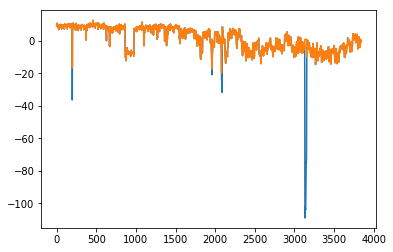

In [8]:
plt.plot(target)
filtered_target = target.copy()
filtered_target.loc[filtered_target < -20] = np.mean(target) 
filtered_target = np.array(filtered_target)
#filtered_target = moving_average(np.array(target), n = 50)
plt.plot(filtered_target)
plt.show()

In [36]:
X = np.array(data)[:,1:-1]
y = filtered_target

newX, newy = get_seq(X,y, n = 2)

x_train, x_test, y_train, y_test = train_test_split(newX,newy, test_size = 0.1, shuffle = False)

In [37]:
pd.DataFrame(newX)

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,7.19077,10.1968,8.25159,-3.6006,-2.64814,6.07928,6.80032,2.42985,-11.3423,10.6018,...,-3.34389,0.566352,0.671236,0.889597,0.938337,-19.2271,3.55197,-17.7128,9.85703,9.81356
1,7.37027,10.1786,8.17564,-3.79632,-1.52149,5.98736,6.97383,3.35023,-9.10281,11.8908,...,-2.80019,2.76958,0.689609,0.761496,0.817412,-17.5192,3.59888,-17.7049,9.81356,10.0675
2,7.44024,10.1658,8.40303,-3.42369,-0.511369,6.20014,6.8582,3.19557,-10.4469,12.0768,...,-1.66557,0.578314,0.712934,0.550861,0.403983,-16.8903,3.64578,-17.697,10.0675,9.79747
3,7.51023,10.1992,8.38165,-3.51465,-0.444921,6.33748,6.9324,2.71935,-9.97125,11.7935,...,-1.21234,-0.219625,0.672912,0.692164,0.625372,-15.2116,3.69269,-17.6891,9.79747,9.42778
4,7.48919,10.0576,8.18994,-3.8514,-2.68043,6.14681,7.09747,2.66116,-11.18,11.8912,...,-1.5159,-0.0490264,0.664386,0.768059,0.865843,-14.5727,3.7396,-17.6812,9.42778,10.0161
5,7.61758,10.3144,8.56949,-3.41212,0.449363,6.11852,6.74153,3.01622,-9.57656,12.1812,...,-0.877753,0.156236,0.718422,0.883184,0.892434,-14.3343,3.7865,-17.6733,10.0161,10.2891
6,7.8754,10.4369,8.91111,-2.85436,0.315581,6.57482,7.45236,3.69957,-9.84137,12.6071,...,-0.992721,0.4562,0.681883,0.431888,0.479542,-14.5027,3.83341,-17.6654,10.2891,10.8214
7,7.98903,10.574,8.96928,-2.82805,-0.86823,6.40661,7.29672,3.26736,-9.03551,13.8769,...,-4.15191,0.848443,0.703992,0.738561,0.63794,-14.8233,3.88032,-17.6576,10.8214,9.49519
8,8.0803,10.5513,8.79758,-2.9141,1.14819,6.72408,7.29249,3.1616,-8.9725,13.8044,...,-1.50817,0.763697,0.651012,1.04584,1.03052,-15.4042,3.92722,-17.6497,9.49519,8.7827
9,8.41246,10.8348,9.22078,-2.57474,-0.676505,6.93781,7.48003,3.75867,-9.20306,13.0615,...,-1.01662,1.06226,0.686687,0.777489,0.726067,-16.3958,3.97413,-17.6418,8.7827,9.17915


In [34]:
newy

array([ 9.17914843,  9.06353817,  9.27317291, ..., -0.35129317,
       -0.30798608, -0.65682423])

In [38]:
model = Lasso(alpha=0.1)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9703934822200648
0.9699558378866118


C:\Users\iLeks\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


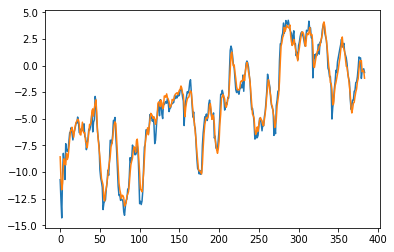

0.5625304317827401


In [39]:
plt.plot(y_test)
plt.plot(model.predict(x_test))
plt.show()
print(np.mean(np.abs(y_test-model.predict(x_test))))

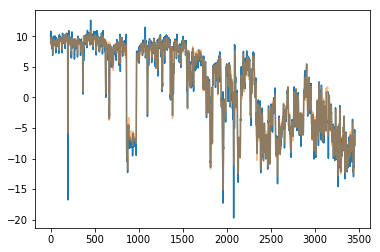

0.6540505530444813


In [40]:
plt.plot(y_train)
plt.plot(model.predict(x_train), alpha = 0.5)
plt.show()
print(np.mean(np.abs(y_train-model.predict(x_train))))

In [42]:
for i,j in enumerate(model.coef_):
    print(np.round(j,3),list(pd.DataFrame(newX))[i])

0.0 0
0.0 1
0.095 2
0.0 3
0.033 4
0.0 5
0.0 6
0.035 7
0.003 8
0.0 9
-0.0 10
-0.019 11
-0.008 12
0.032 13
0.0 14
0.0 15
0.0 16
0.0 17
0.0 18
0.0 19
-0.0 20
0.0 21
0.016 22
0.0 23
0.0 24
0.016 25
0.0 26
0.065 27
0.0 28
-0.0 29
-0.0 30
-0.0 31
-0.0 32
-0.007 33
0.005 34
0.017 35
0.0 36
0.0 37
0.0 38
0.0 39
0.006 40
0.0 41
0.014 42
0.004 43
-0.007 44
-0.0 45
-0.0 46
-0.019 47
-0.0 48
-0.0 49
0.0 50
0.0 51
-0.0 52
-0.0 53
0.0 54
-0.0 55
0.0 56
-0.0 57
-0.007 58
0.002 59
0.002 60
0.017 61
-0.007 62
0.0 63
0.0 64
-0.0 65
-0.022 66
0.001 67
0.001 68
0.0 69
0.0 70
0.0 71
-0.0 72
-0.002 73
-0.0 74
-0.0 75
-0.004 76
-0.0 77
-0.0 78
-0.008 79
-0.0 80
-0.004 81
-0.0 82
0.001 83
-0.001 84
-0.0 85
0.004 86
0.01 87
-0.002 88
0.0 89
0.0 90
0.005 91
-0.024 92
-0.0 93
0.014 94
-0.0 95
0.0 96
-0.0 97
-0.0 98
-0.046 99
-0.0 100
-0.0 101
-0.0 102
-0.0 103
-0.0 104
-0.0 105
-0.0 106
0.025 107
0.0 108
0.006 109
-0.005 110
0.003 111
0.0 112
0.0 113
-0.0 114
-0.0 115
-0.017 116
0.0 117
-0.001 118
-0.0 119
-0.00